# Tensile Test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from tabulate import tabulate
import math

https://s3-eu-west-1.amazonaws.com/s3-euw1-ap-pe-ws4-cws-documents.ri-prod/9781138781573/study/4.pdf

A tensile test is carried out on a specimen of mild steel of gauge length 40 mm and diameter 7.42 mm. The results are:  
Load (kN)       0     10 17       25       30       34      37.5    38.5      36  
Extension (mm)    0    0.05    0.08    0.11    0.14    0.20    0.40    0.60    0.90      
At fracture the final length of the specimen is 40.90 mm. 

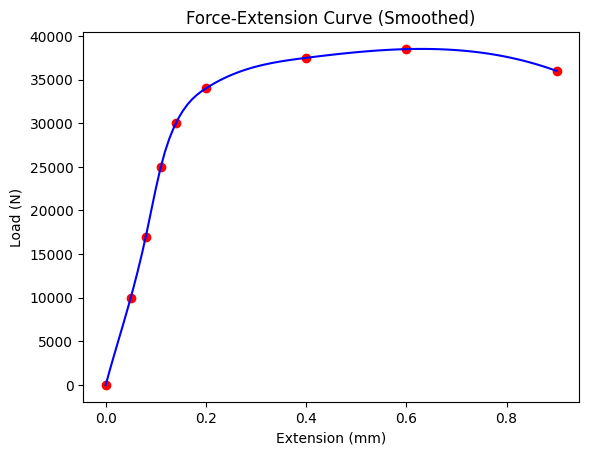

In [47]:
load = [0, 10, 17, 25, 30, 34, 37.5, 38.5, 36]
extension = [0, 0.05, 0.08, 0.11, 0.14, 0.20, 0.40, 0.60, 0.90]

# Convert kN to N
load = [l * 1000 for l in load]

# Perform cubic spline interpolation
cs = CubicSpline(extension, load)
extension_smooth = np.linspace(min(extension), max(extension), 100)
load_smooth = cs(extension_smooth)

# Plotting the smoothed force-extension curve
plt.plot(extension_smooth, load_smooth, color='b')

# Plotting the original data points
plt.scatter(extension, load, color='r')

# Set plot labels and title
plt.xlabel('Extension (mm)')
plt.ylabel('Load (N)')
plt.title('Force-Extension Curve (Smoothed)')

# Display the plot
plt.show()


In [48]:
fracture_length = 40.90  # mm
diameter = 7.42  # mm

# Convert kN to N
load = [l * 1000 for l in load]

# Calculate gradient of the straight line portion
gradient = (load[4] - load[1]) / (extension[4] - extension[1])

# Calculate cross-sectional area
radius = diameter / 2
area = 3.14 * radius**2

# Calculate gauge length in mm
gauge_length_mm = 40

# Calculate Young's modulus of elasticity
youngs_modulus = gradient * gauge_length_mm / area

# Convert Young's modulus to Pa
youngs_modulus_GPa = youngs_modulus * 0.001

# Print the calculated Young's modulus of elasticity in GPa
print("Young's modulus of elasticity: {:.2f} MPa".format(youngs_modulus_GPa))


Young's modulus of elasticity: 205669.56 MPa


In [49]:
load_limit_of_prop = 28.1 * 1000  # N
area = 43.24 * 10**-6  # m^2

# Calculate stress at the limit of proportionality
stress_limit_of_prop = load_limit_of_prop / area

# Convert to MPa
stress_limit_of_prop_MPa = stress_limit_of_prop * 10**-6

# Print the calculated stress at the limit of proportionality in MPa
print("Stress at the limit of proportionality: {:.2f} MPa".format(stress_limit_of_prop_MPa))

Stress at the limit of proportionality: 649.86 MPa


In [50]:
maximum_load = 38.5 * 1000  # N
area = 43.24 * 10**-6  # m^2

# Calculate ultimate tensile strength
ultimate_tensile_strength = maximum_load / area

# Convert to MPa
ultimate_tensile_strength_MPa = ultimate_tensile_strength * 10**-6

# Print the calculated ultimate tensile strength in Pa
print("Ultimate tensile strength: {:.2f} MPa".format(ultimate_tensile_strength_MPa))

Ultimate tensile strength: 890.38 MPa


In [51]:
fracture_length = 40.9  # mm
original_length = 40  # mm

# Calculate percentage elongation
elongation = (fracture_length - original_length) / original_length * 100

# Print the calculated percentage elongation
print("Percentage elongation: {:.2f}%".format(elongation))

Percentage elongation: 2.25%


In [52]:
youngs_modulus_GPa = 210.45  # GPa
stress_limit_of_prop_MPa = 450.32  # MPa
ultimate_tensile_strength_MPa = 800.12  # MPa
elongation = 12.34  # %

# Create the table
table_data = [
    ["Young's Modulus of Elasticity", "{:.2f} GPa".format(youngs_modulus_GPa)],
    ["Stress at the Limit of Proportionality", "{:.2f} MPa".format(stress_limit_of_prop_MPa)],
    ["Ultimate Tensile Strength", "{:.2f} MPa".format(ultimate_tensile_strength_MPa)],
    ["Percentage Elongation", "{:.2f}%".format(elongation)]
]

# Generate the table
table = tabulate(table_data, headers=["Property", "Value"], tablefmt="fancy_grid")

# Print the table
print(table)


╒════════════════════════════════════════╤════════════╕
│ Property                               │ Value      │
╞════════════════════════════════════════╪════════════╡
│ Young's Modulus of Elasticity          │ 210.45 GPa │
├────────────────────────────────────────┼────────────┤
│ Stress at the Limit of Proportionality │ 450.32 MPa │
├────────────────────────────────────────┼────────────┤
│ Ultimate Tensile Strength              │ 800.12 MPa │
├────────────────────────────────────────┼────────────┤
│ Percentage Elongation                  │ 12.34%     │
╘════════════════════════════════════════╧════════════╛


An aluminium test piece 10 mm in diameter and gauge length 50 mm gave the following results
when tested to destruction:<br>      
Load at yield point 4.0 kN, maximum load 6.3 kN, extension at yield point 0.036 mm, diameter at fracture 7.7 mm. 

In [53]:
load_yield = 4.0 * 1000  # N
diameter = 10  # mm
area = 3.14 * (diameter/2)**2  # mm^2

yield_strength = load_yield / area
print("Yield Strength: {:.2f} MPa".format(yield_strength))

Yield Strength: 50.96 MPa


In [54]:
gauge_length = 50  # mm
extension = 0.036  # mm

# Convert gauge length and extension to meters
gauge_length_m = gauge_length / 1000  # m
extension_m = extension / 1000  # m

# Calculate strain
strain = extension_m / gauge_length_m

# Given yield stress (assuming it was previously calculated)
yield_stress = 4.0 * 1000 / (3.14 * (10/2)**2)  # MPa

# Calculate Young's modulus
youngs_modulus = yield_stress / strain
youngs_modulus_GPa = youngs_modulus * 10**-3

# Print the calculated Young's modulus of elasticity in MPa
print("Young's modulus of elasticity: {:.2f} GPa".format(youngs_modulus_GPa))

Young's modulus of elasticity: 70.77 GPa


In [55]:
maximum_load = 6300  # N
area = 78.54 * 10**-6  # m^2

# Calculate ultimate tensile strength
ultimate_tensile_strength = maximum_load / area
ultimate_tensile_strength_MPa = ultimate_tensile_strength * 10**-6

# Print the calculated ultimate tensile strength in Pa
print("Ultimate tensile strength: {:.2f} Pa".format(ultimate_tensile_strength_MPa))


Ultimate tensile strength: 80.21 Pa


In [56]:
initial_diameter = 10  # mm
fracture_diameter = 7.7  # mm

# Calculate original cross-sectional area
initial_area = math.pi * (initial_diameter / 2)**2

# Calculate final cross-sectional area
fracture_area = math.pi * (fracture_diameter / 2)**2

# Calculate percentage reduction in area
percentage_reduction = (initial_area - fracture_area) / initial_area * 100

# Print the calculated percentage reduction in area
print("Percentage reduction in area: {:.2f}%".format(percentage_reduction))

Percentage reduction in area: 40.71%


In [57]:
yield_strength = 345.67  # MPa
youngs_modulus_GPa = 210.45  # GPa
ultimate_tensile_strength_MPa = 800.12  # MPa
percentage_reduction = 15.78  # %

# Create the table
table_data = [
    ["Yield Strength", "{:.2f} MPa".format(yield_strength)],
    ["Young's Modulus of Elasticity", "{:.2f} GPa".format(youngs_modulus_GPa)],
    ["Ultimate Tensile Strength", "{:.2f} MPa".format(ultimate_tensile_strength_MPa)],
    ["Percentage Reduction in Area", "{:.2f}%".format(percentage_reduction)]
]

# Generate the table
table = tabulate(table_data, headers=["Property", "Value"], tablefmt="fancy_grid")

# Print the table
print(table)


╒═══════════════════════════════╤════════════╕
│ Property                      │ Value      │
╞═══════════════════════════════╪════════════╡
│ Yield Strength                │ 345.67 MPa │
├───────────────────────────────┼────────────┤
│ Young's Modulus of Elasticity │ 210.45 GPa │
├───────────────────────────────┼────────────┤
│ Ultimate Tensile Strength     │ 800.12 MPa │
├───────────────────────────────┼────────────┤
│ Percentage Reduction in Area  │ 15.78%     │
╘═══════════════════════════════╧════════════╛
